# Speeedup for multi-GPU parallelism

Parallelized via CPU-level (OpenMP) level for an outer loop

In [1]:
# for interactive plots uncomment this following line
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

## load data

In [2]:
t = np.loadtxt('times_gpu_parallel.csv')
# N, M, OMP, size_outer, total, h_create, LU, ZGEMM, h_destroy
# N, M are hard-coded to 64, 1000
t = t[:, 2:]

N, M = len(set(t[:,0])), len(set(t[:,1]))
t = t.reshape(N, M, -1)

n_omp = t[:,0,0]
n_loop = t[0,:,1]

## plot runtime and speedup

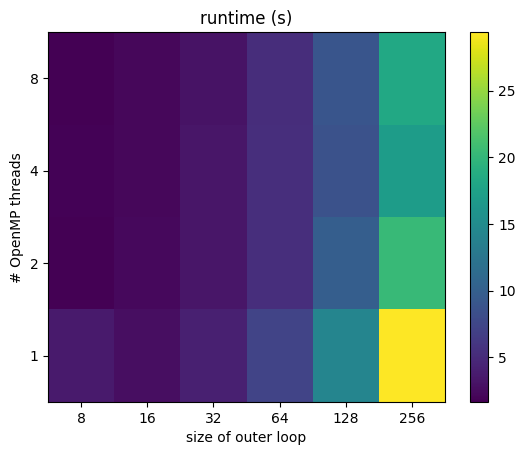

In [3]:
plt.figure()
plt.pcolormesh(t[:,:,2]) # 2 is total time (then h_create, LU, ZGEMM, h_destroy)
plt.colorbar()
plt.title('runtime (s)')
plt.xticks(np.arange(len(n_loop))+0.5, [int(i) for i in n_loop])
plt.yticks(np.arange(len(n_omp))+0.5, [int(i) for i in n_omp])
plt.xlabel('size of outer loop')
plt.ylabel('# OpenMP threads')
           
plt.show()

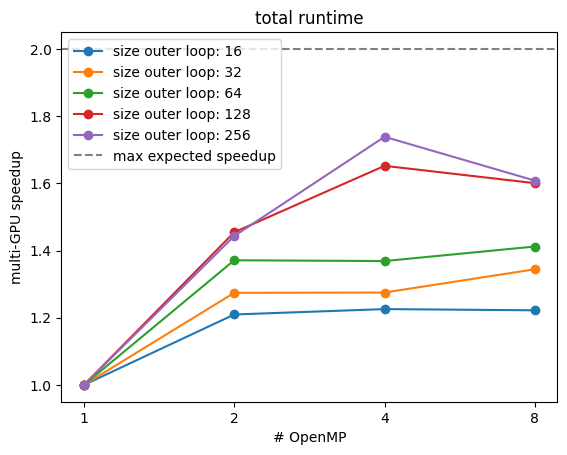

In [4]:
plt.figure()
# skip data for outer loop size 8
for i in range(1, len(n_loop)):
    # index 2 is total time
    plt.plot(t[0,i,2]/t[:,i,2], label=f'size outer loop: {int(n_loop[i])}', marker='o', ls='-')
plt.xlabel('# OpenMP')
plt.ylabel('multi-GPU speedup')
plt.xticks(np.arange(len(n_omp)), [int(i) for i in n_omp])
plt.axhline(2, ls='--', color='grey', label='max expected speedup')
plt.legend()
plt.title('total runtime')
plt.show()

- max expected speedup is 2 (2GPUs per node on CLAIX)
- for larger outer-loop size the speedup is quite decent in the total runtime (~1.75 for outer-loop size of 256 with 4 OpenMP threads)
- potential points for optimization:
  * OpenMP pinning